# DataScience 2000B Final 2025 - Open Book part

## Your Student ID: 251171681

## General 
The instruction for the final exam for DS2000B is included in this Jupyter Notebook. 

- You are allowed to use any document and source and look up documents on the internet. You are not allowed to use chatGPT, copilot, or any other AI engine that provides programming assistance. 
- You or not allowed to share documents, or communicate in any other way with people during period of final. Given that there are students with extra time, this is until 3pm.  
- You are only allowed to use the python packages listed under "preliminaries" - the use of other regression (e.g., statsmodels, numpy polyfit) or machine learning toolboxes (e.g., sklearn) is not permitted. 
- All the code you are using from previous assignments or labs needs to be included in the notebook. 
- Most questions also require some written answer. The answer to these questions should be given in full English sentences. 
- All Figures should be appropriately labeled in x and y axis.  
- The Final exam needs to be submitted via OWL / Gradescope before 12:00pm, noon. If you have approved accommodation, you need to submit after 12:00pm + your extra time after the start of the exam at 2pm.
- Ensure that your notebook runs before submitting. Submit the notebook with all output included. 
- Any final submitted later than the alloted time will be scored with 0 pts.
- You can submit multiple version - the last submitted version will be graded.   
- **It is your responsibility that you submit the correct file. Please check that you uploaded the correct file by downloading the submitted version and opening it in jupyter before you leave the exam room.** 

## Problem description 

In the risk of being overly self-referential, you will be analyzing the grades from the Introduction to Data Science course from 2024. The dataset is provided in the file `grades_DS2000.csv`. Last years course did not have lecture questions or lab quizzes. Instead all assignment were graded between 0-100pts. The total course grade was 30\% Assignments, 30\% Midterm, and 40\% Final. Last year, students could enrol in the course via the DataScience 2000 course code, or the Integrated Science 2002 course code. 

The file contains the following columns:
- `Gender`: Gender of the student ('M' or 'F')
- `Course`: Whether the student was enrolled via the DATASCI or INTEGSCI course code.  
- `MidtermOpen`: Open-book part of the midterm (0-50) 
- `MidtermClosed`: Closed-book part of the midterm (0-50)
- `Midterm`: Total score on the midterm (0-100)
- `FinalOpen`: Open-book part of the final exam (0-50) 
- `FinalClosed`: Closed-book part of the final exam (0-50)
- `Final`: Total score on the final exam (0-100)
- `Assign_first`: Average score on the assignments 1-6 (0-100))
- `Assign_second`: Average score on the assignments 7-11 (0-100)
- `Total`: Total course grade after adjustment (0-100)
- `passed`: Did the student pass the course? (0: no, 1: yes)

*Note that the Gender and Course column have been randomly shuffled to protect the privacy of last year's student. Otherwise, the data set in entirely veridical. For the purposed of this exam, assume that the data have not been shuffled.*  

In [83]:
# Preliminaries - you are only allowed to use the following packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as so

## Task 1: (15pts)
### Questions 1.1: 
How many female students were enrolled via the Integrated Science course code?  [2pts]

In [84]:
df = pd.read_csv('grades_DS2000.csv')

table = pd.crosstab(df['Gender'], df['Course'])
print(table)
print(f"There are {table['INTEGSCI']['F']} female students enrolled via the integrated science course code")


Course  DATASCI  INTEGSCI
Gender                   
F            45        11
M            53        11
There are 11 female students enrolled via the integrated science course code


### Question 1.2
What is the conditional probability of passing the course, given that the student was male and enrolled in DATASCI (not Integrated Science Course code)? [2pts]

In [85]:
table2 = pd.crosstab(df['passed'], df['Course'], margins=True)
print(table2)

table2['DATASCI'][1.0]/table2['DATASCI']['All']

Course  DATASCI  INTEGSCI  All
passed                        
0.0          10         2   12
1.0          88        20  108
All          98        22  120


np.float64(0.8979591836734694)

### Question 1.3
If you want to compare the total course grade (`Total`) in this course between DataSci and IntegSci students or between male and female students, which statistics would you use? Justify your answer from the characteristics of the distribution of total grades. [2pts]

I would use median as there are a lot of outliers that would skew the mean


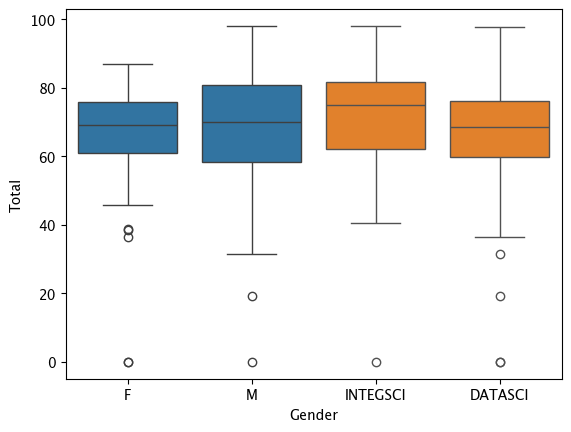

In [86]:
sns.boxplot(x = 'Gender', y = 'Total',  data = df)
sns.boxplot(x = 'Course', y = 'Total',  data = df)
print('I would use median as there are a lot of outliers that would skew the mean')


### Question 1.4 
How many students missed the midterm (the grade for midterm is missing in the data frame)? What is the median grade of the students that missed the midterm in the final exam (``Final``)? What was the median grade of `Final` for the students that took the midterm exam? [3pts]

In [87]:
count = sum(df['Midterm'].isna())
print(f"{count} students missed the midterm")

print(f"median ffinal inal grade for students who missed the midterm is {df[df['Midterm'].isna()]['Final'].median()}")
print(f"median grade for students who took the midterm is {df[~df['Midterm'].isna()]['Final'].median()}")


12 students missed the midterm
median ffinal inal grade for students who missed the midterm is 32.0
median grade for students who took the midterm is 56.5


### Question 1.5
Does taking the midterm (no matter the grade) have a positive practice effect for the final exam (`Final`)? If we assume that the factors that led students to miss the midterm were **random**, we *could* consider whether students took the midterm or not as **random assignment**. Given this assumption, test the hypothesis that taking the midterm has a **positive** practice effect for (i.e. makes your score higher on) the final exam. 

Written answer: Clearly state the Null-hypothesis. 

Conduct a suitable statistical test to establish whether the difference in **median** grade of the group that took the midterm and the group that missed the midterm is statistically significant.  

Written answer: What would be your conclusion be, if you assumed that students were missing the midterm at random? What is a possible caveat with this assumption and hence the conclusion? [6pts]

Null hypotheses: Taking the midterm has no or a negative effect for final exam score.

In [97]:
def bootstrap(data, N, fcn, numIter=1000):
    array = np.zeros(numIter)
    for i in range(numIter):
        sample = np.random.choice(data, N, replace=True)
        array[i] = fcn(sample)
    
    return array
    


def median_fcn(data):
    return data.median()

bootstrap(df, 50, median_fcn)

ValueError: a must be 1-dimensional

## Task 2: Predicting the Performance on the final (25pts)
In Task 2, we are building a predictive model of the performance on the final exam. For **all** questions in Task 2, you will use the variable ``Final`` as the **dependent** variable.   

### Question 2.1: 
Using Ordinary least-square (OLS) linear regression, report the $R^2$-value for a model that uses only the grade for the first half of Assignments to predict the ``Final``. Also report the $R^2$-value for a OLS regression model that uses only the grade of the second half of Assignments. Which of the two has a higher **fitted** $R^2$ value? [3pts]


R2 for first half of assignments is 0.25198654056500125
R2 for second half of assignments is 0.20441225378240035
The R2 for first half of assignments have a higher fitted r2


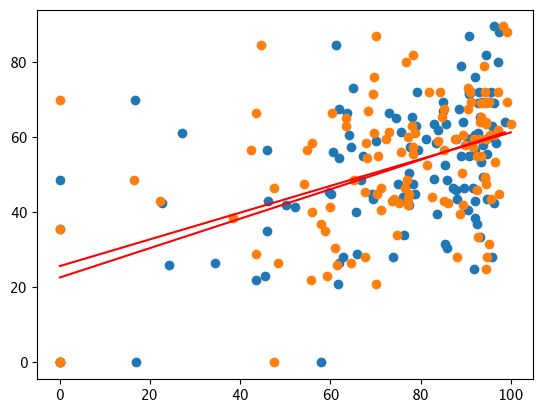

In [53]:
def simpleRegPredict(b,x):
    yp=b[0]+b[1]*x
    return yp

def simpleRegLossRSS(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (rss,deriv)

def simpleRegLossL1(b, x, y, fcn=simpleRegPredict):
    deriv = np.zeros(2)
    yp = fcn(b, x)

    yp = fcn(b, x)
    residual = y - yp
    sad = sum(abs(residual))
    deriv[0] = -sum(np.sign(residual))
    deriv[1] = -sum(np.sign(residual)*x)

    return sad, deriv

def plotPrediction(b, x, y, fcn=simpleRegPredict):
    plt.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = fcn(b, xp)
    return plt.plot(xp, yp, 'r')


def simpleRegFit(x, y, fcn=simpleRegLossRSS):
    b0=[np.mean(y),0]
    RESULT = so.minimize(fcn, b0, args = (x, y), jac = True)
    b = RESULT.x

    plotPrediction(b, x, y)

    RSS = simpleRegLossRSS(b, x, y)[0]
    TSS = sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    return R2

x = df['Assign_first']
y = df['Final']
R2 = simpleRegFit(x, y, fcn=simpleRegLossRSS)
print(f"R2 for first half of assignments is {R2}")

x2 = df['Assign_second']
y = df['Final']
R2 = simpleRegFit(x2, y, fcn=simpleRegLossRSS)
print(f"R2 for second half of assignments is {R2}")

print('The R2 for first half of assignments have a higher fitted r2')


### Question 2.2: 
Report the 95% Confidence interval for the difference in $R^2$ for the model using the first half of the assignment minus the $R^2$ for the model using the second half of the assignments. [6pts]  

In [51]:
def bootstrap(data, N, fcn, numIter=1000):
    array = np.zeros(numIter)
    for i in range(numIter):
        sample = np.random.choice(data, N, replace=True)
        array[i] = fcn(sample)
    
    return array

def mean_fcn(data):
    return data.mean()

def confidenceInt(data, prec):
    lower = (100-prec)/2
    upper = (prec + lower)
    list = [np.percentile(data, lower), np.percentile(data, upper)]
    return list

df['Asn_difference'] = df['Assign_first'] - df['Assign_second']

sampling_dist = bootstrap(df['Asn_difference'], 25, mean_fcn)
confidenceInt(sampling_dist, 95)

[np.float64(-6.670699999999999), np.float64(7.908716666666668)]

### Question 2.3: 
Using ordinary least-square linear regression, determine whether the Open-book or Closed-book part of the Midterm is a better explanatory variable for the ``Final`` grade. Report your conclusion supported by the corresponding fitted $R^2$-values. For this analysis you need to exclude the students that did not take the midterm. [2pts]

R2 for open midterm is 0.08254855553043028
R2 for closed misterm is 0.08254855553043028



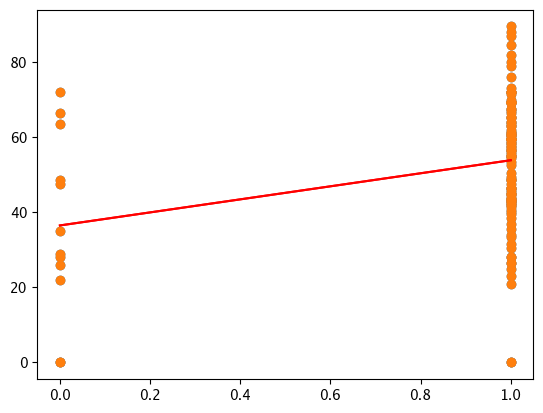

In [65]:
x = ~df['MidtermOpen'].isna()
y = df['Final']
R2 = simpleRegFit(x, y, fcn=simpleRegLossRSS)
print(f"R2 for open midterm is {R2}")

x2 = ~df['MidtermClosed'].isna()
y = df['Final']
R2 = simpleRegFit(x2, y, fcn=simpleRegLossRSS)
print(f"R2 for closed misterm is {R2}")

print("The R2 open book and closed book part of the exam are the same")

### Question 2.4 
Report the regression coefficient for ``MidtermClosed`` alone to fit the grade in the ``Final``. Then report the regression coefficient of ``MidtermClosed`` if we account for ``MidtermOpen`` in the same model. 

Written answer: How and why does the regression coefficient for MidtermClosed change between the models? If you were to conduct a bootstrap analysis on the model with both MidtermClosed and MidtermOpen, would be the correlation between the the two regression coefficients across bootstrap samples be positive or negative? [3pts]

In [70]:
def multRegPredict(b, D, xname):
    yp=np.ones(len(D))*b[0] 

    for i in range(len(xname)):
        yp += b[i+1]*D[xname[i]]
    return yp

def multRegLossRSS(b,D,y,xname):
    deriv = np.zeros(len(b))
    yp = multRegPredict(b, D, xname)
    res = y - yp
    rss = sum(res**2)
    deriv[0]=-2*sum(res)
    for i in range(len(xname)):
        deriv[i+1] = -2*sum(res*D[xname[i]])
    return rss, deriv

def multRegFit(D, y, xname):
    b0 = np.zeros(len(xname)+1)
    RESULT = so.minimize(multRegLossRSS, b0, args=(D,y,xname), jac=True)
    b = RESULT.x

    RSS = multRegLossRSS(b,D,y,xname)[0]
    TSS = sum((y - np.mean(y))**2)
    R2 = 1 - RSS/TSS

    return R2, b

df['MidtermClosed_no_na'] = ~df['MidtermClosed'].isna()
df['MidtermOpen_no_na'] = ~df['MidtermOpen'].isna()
y = df['Final']

R2, b = multRegFit(df, y, ['MidtermClosed_no_na'])
print(f"regression coefficient for midterm closed is {b}")

R2, b = multRegFit(df, y, ['MidtermClosed_no_na', 'MidtermOpen_no_na'])
print(f"regression coefficient for midterm closed is {b}")

regression coeficient for midterm closed is [36.4999997 17.3750003]
regression coeficient for midterm closed is [36.5     8.6875  8.6875]


The coefficient for the model changed because there both predictors positively correlate to the final. With double the predictors, each one would have to be less (in this case around half) for the coefficient to fit the model similarly to the last. The relationship between the two regression coefficients would be positive.

### Question 2.5: 
Now we want to predict the ``Final`` grade in a **single** model that takes into account whether students missed the midterm, and if they did not miss the midterm, what grade they had on ``MidtermOpen`` and ``MidtermClosed``. For this, you need to set ``MidtermOpen`` and ``MidtermClosed`` to zero for the students who missed the exam, and add a variable into the model that informs the model whether they missed the midterm. 

Use leave-one-out cross-validation to compare a model that only uses ``MidtermOpen`` and ``MidtermClosed`` as predictor variables (for missed midterms, assumeing a grade of zero) to a mode that uses ``MidtermOpen``,``MidtermClosed``, and whether they mussed the midterm. Based on result, which one is the better predictive model? [3pts]

In [96]:
def leaveOneOutCV(df, y, xname, fit_fcn=multRegFit, predict_fcn=multRegPredict):
    N = len(df)
    yp = np.zeros(N)
    ind = np.arange(N)
    for i in range(len(df)):
        xtrain = df.iloc[ind!=i]
        ytrain = y[ind!=i]
        b = fit_fcn(xtrain, ytrain, xname)[1]
        yp[i] = predict_fcn(b, df.iloc[i], xname)[0]
    
    TSS = sum((y - np.mean(y))**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1 - RSScv/TSS

    b = fit_fcn(df, y, xname)[1]
    yf = predict_fcn(b, df, xname)
    RSS = sum((y-yf)**2)
    R2 = 1 - RSS/TSS

    return R2cv, R2

df['MidtermClosed_zero'] = df['MidtermClosed'].fillna(0) 
df['MidtermOpen_zero'] = df['MidtermOpen'].fillna(0)
df['Missed_Midterm'] = df['MidtermClosed']==0

R2, b = multRegFit(df, y, ['Missed_Midterm', 'MidtermClosed_zero', 'MidtermOpen_zero'])

print(leaveOneOutCV(df, y, ['MidtermClosed_zero', 'MidtermOpen_zero']))
print(leaveOneOutCV(df, y, ['Missed_Midterm', 'MidtermClosed_zero', 'MidtermOpen_zero']))


(0.3445107570295105, 0.38344556580284017)
(0.20340971489296644, 0.3835555905240614)


The model with just midterm closed and open parameters is a better model This is because the R2cv has a higher score

### Question 2.6:  
Now we want build the best possible linear prediction model of the ``Final`` exam performance from the following variables: 
 * MidtermOpen (use 0 for missed midterms)
 * MidtermClosed (use 0 for missed midterms)
 * Whether the midterm was missed 
 * Assign_first 
 * Assign_second
 * Gender (Male vs Female)
 * Course (DS vs. Integrated Science)

Introduce appropriate coding for the discrete variables. 
Using backwards stepwise regression to choose the most appropriate model (optimal subset of explanatory variables) for this data set. For model comparision, again use **leave-one-out** crossvalidation. Show your procedure that you use to identify the best model. [6pts]

*Tip: If you cannot get the model fit or cross-validation to work, do write some (pseudo-code), which shows how you would proceed for partial points* 

for i in range(n^2):
    select 1 item from the subset of all possible combination of explanatory variables
    do crossvalidation
    save the maximum R2cv and note the combination of explanatory variables

return the combination of explanatory variables with the highest R2cv

### Question 2.7 
Written answer: Assume your best model from all the models you considered had a predictive $R^2 = 0.4$. If you now used the best to predict the grade for another year of DS2000 (assuming the class was taught the same way), would you on average be able to predict $40\%$ of the variation in the final? If not, mention **two** factors that would make the average predictive accuracy of the model lower than the predictive R2 that you established by cross-validation.  [2pts]

## Task 3 (10pts)
In this task, we will try to build a predictive model of whether the student will pass the class or not (``passed``) from the information we have available after the midterm. 

### Question 3.1: 
Create and fit a logistic regression model that predicts whether the student passed the course from the following variables. 
 * MidtermOpen  (for missed midterm, assume 0 grade)
 * MidtermClosed (for missed midterm, assume 0 grade)
 * Did they miss the midterm? 
 * Assign_first 
 * Gender (Male vs Female)
 
Report the log-likelihood of the model, well as the regression coefficient for Gender. Based on the sign of the regression coefficient, does being male seem to increase or decrease your chances of passing the course (accounting for the other variables)? [4pts] 




In [98]:
def logisticRegPredict(b,D,xname):
    yp=np.ones(len(D.index))*b[0]      
    for i in range(len(xname)):
        yp=yp+D[xname[i]]*b[i+1]       
    p = np.exp(yp)/(1+np.exp(yp))
    return p

def logisticRegLoss(b,D,y,xname):
    p = logisticRegPredict(b,D,xname)
    cost = -y*np.log(p)-(1-y)*np.log(1-p)
    N=len(xname)
    grad=np.zeros(N+1)
    res = y-p
    grad[0]=-sum(res)
    for i in range(N):
        grad[i+1]=-np.sum(D[xname[i]]*res)    
    return (cost.sum(),grad)

def logisticRegFit(D,y,xname,figure=1):
    N=len(xname)
    b0=np.zeros(N+1)
    RES = so.minimize(logisticRegLoss,b0,args=(D,y,xname),jac=True)
    b = RES.x
    ll = -RES.fun 
    p = logisticRegPredict(b,D,xname)
    if (N==1 & figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        print(b[0])
        print(b[1])
        pp=np.exp(yp)/(1+np.exp(yp))
        ax.plot(xp,pp,'r-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    return (ll,b)

logisticRegFit(df,y,['Gender'],figure=1)

TypeError: can't multiply sequence by non-int of type 'float'

### Question 3.2: 
Use 10-fold cross-validation to determine whether the model from Question 3.1 predicts the passing of the course better than the model that uses only the first four variables (and thus excludes gender). Which one is the better model? [4pts]

### Question 3.3: 
From the results of question 3.2, report the bayes factor that tests the idea of whether Gender is a good predictor of passing the course, given the other variables in the model. What do you conclude?

*Note: If you did not solve 3.2, just assume some answer and describe what you would conclude from that (and how)* 